Ova sveska sluzi za pocetno upoznavanje sa bazom podataka i odredjivanje pitanja na koje ce ovaj projekat odgovoriti.
BITNO! Ovo je pocetna verzija veoma sklona promenama.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
df = pd.read_csv('../dataset/apartments_for_rent_classified_10K.csv',sep=';',encoding="cp1252", low_memory=False)

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,"This unit is located at 5407 Abbott Place - Abbott, Edina, 55410, MNMonthly rental rates range from $6000We have 5 beds units available for rent",NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, Potomac, 20854, MDMonthly rental rates range from $11000We have 6 beds units available for rent",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldyn offers some of the finest amenities amongst Upper West Side apartments. The club-style way of apartment living offers residents countless amenities right at their doorstep - the cornerstone being the 40,000 sq. feet La Palestra Athletic Club and Spa. This prestigious facility includes a 75 foot indoor pool, hot bath-tub, 38 foot rock climbing wall, basketball and squash courts, personal training, bowling alley, and more!Community Amenities 75 ft indoor swimming pool and hot bathtub 38 Rock Climbing Wall Elegant Roman and Williams designed lobby & lounge Childrens indoor children's play area by KIDVILLE Pets allowed Free shuttle to Columbus Circle & 72nd/Broadway Entertainment room with gourmet catering kitchen 24hr attendant at door/concierge services On-site parking garage Private landscaped cour

Imamo oko 10k instanci i 22 atributa. 

In [5]:
df['category'].value_counts()

category
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: count, dtype: int64

Sto se tice kateogrija, vidimo da je gotovo 100% instanci apartman. Imajuci u vidu da se 'home' i 'apartment' idejno ne razlikuju previse, kao i to da termin 'short_term' oznacava stambenu jedinicu koja se izdaje na kraci period (1-6 meseci), svakako mozemo i te 4 instance pripojiti u kategoriju 'apartman'

In [6]:
df.loc[df['category'] == 'housing/rent/apartment', 'category'] = 'apartment'
df.loc[df['category'] == 'housing/rent/home', 'category'] = 'apartment'
df.loc[df['category'] == 'housing/rent/short_term', 'category'] = 'apartment'

Atributi koji je od veceg znacaja su cena, kvadratura stana. 

In [7]:
df['price'].describe()

count    10000.000000
mean      1486.277500
std       1076.507968
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      52500.000000
Name: price, dtype: float64

Ovaj maksimum je ocigledno neka greska. Hocu da plotujem da vidim raspodelu cena. 

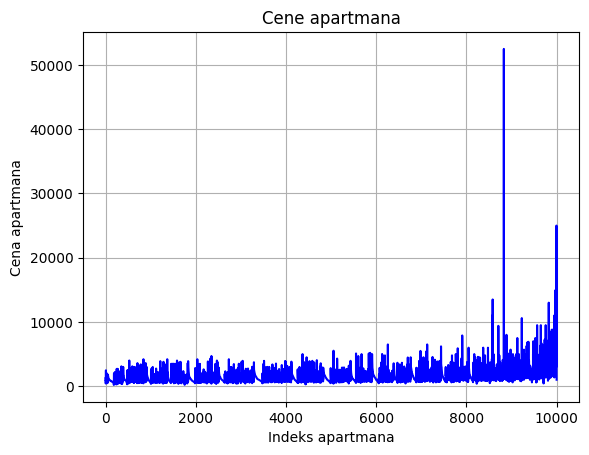

In [8]:
# Generisanje grafikona cene apartmana
plt.plot(df.index, df['price'], color='blue', linestyle='-')

# Dodatno formatiranje grafa
plt.xlabel('Indeks apartmana')
plt.ylabel('Cena apartmana')
plt.title('Cene apartmana')
plt.grid(True)
plt.show()

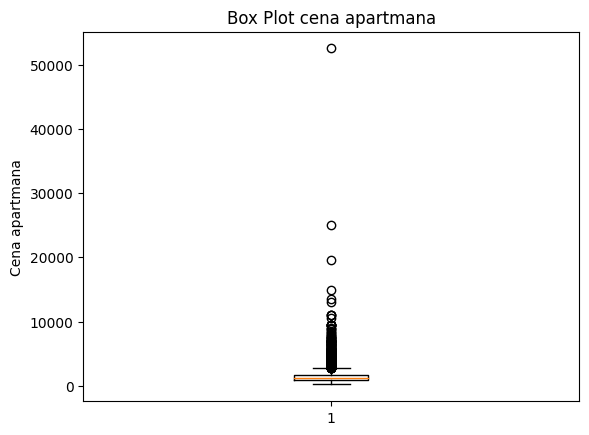

In [9]:
plt.boxplot(df['price'])

# Dodatno formatiranje grafa
plt.ylabel('Cena apartmana')
plt.title('Box Plot cena apartmana')
plt.show()

Jedan ocigledan autlajer je apartman kome je cena navodno 50k mesecno. Teoretski je moguce, ali je verovatnije da se desila greska pri unosu podataka. Posto je to samo jedna instanca, korekcija nije zahtevna.

In [10]:
df.loc[df['price'] == 52500]['body']

8829    Barstow It's 14/18ft. studio apartment furnished include utilities, television, Internet hook up nice big deck. $500.00/ month $350.00 deposit. 1st month$450.00. A-c, Alarm, Balcony, Deck, Patio or Porch, Cable Ready, Microwave, Oversized Closets, Paid Utilities, Highspeed internet Available
Name: body, dtype: object

In [11]:
df.loc[df['price'] == 52500,'price'] = 500

In [12]:
df['price'].describe()

count    10000.000000
mean      1481.077500
std        947.983982
min        200.000000
25%        949.000000
50%       1270.000000
75%       1695.000000
max      25000.000000
Name: price, dtype: float64

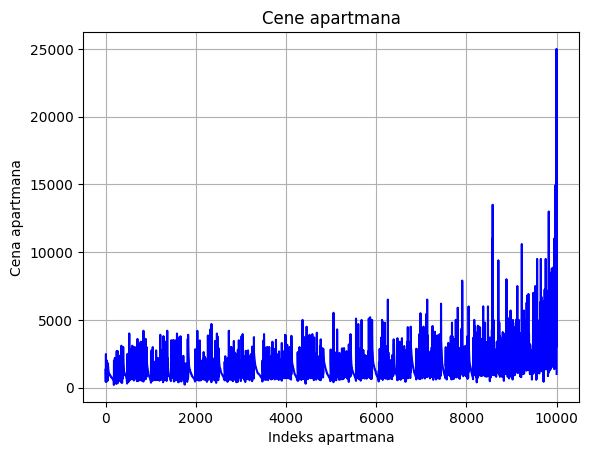

In [13]:
# Generisanje grafikona cene apartmana
plt.plot(df.index, df['price'], color='blue', linestyle='-')

# Dodatno formatiranje grafa
plt.xlabel('Indeks apartmana')
plt.ylabel('Cena apartmana')
plt.title('Cene apartmana')
plt.grid(True)
plt.show()


Ovo je realnija slika. 

In [14]:
df.loc[df['price'] == 25000]['body']

9996    This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent
Name: body, dtype: object

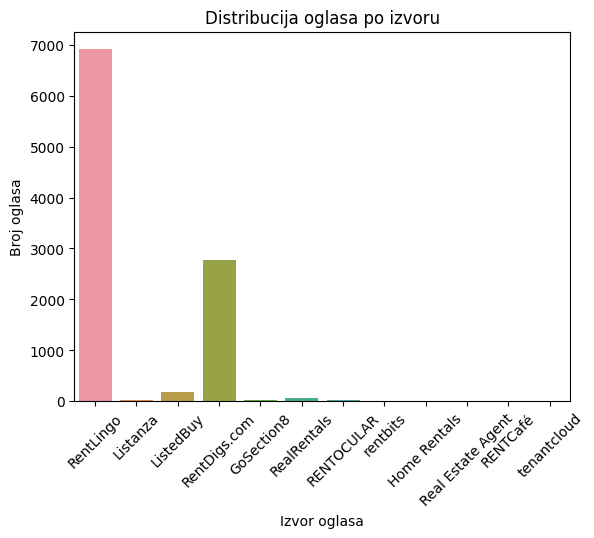

In [15]:
# Generisanje count plot-a za kategoricke vrednosti 'source'
sns.countplot(data=df, x='source')

# Dodatno formatiranje grafa
plt.xlabel('Izvor oglasa')
plt.ylabel('Broj oglasa')
plt.title('Distribucija oglasa po izvoru')
plt.xticks(rotation=45)  # Rotiranje oznaka x-ose za bolju čitljivost
plt.show()


Dve kategorije se izdvajaju, sa ociglednim pobednikom: RentLingo i ListedBuy

Ukoliko se fokus okrene samo na te dve kategorije, moze se primeniti nebalansirana binarna klasifikacija kasnije. Neka ga za sad

Ostaje jos jedan atirbut koji je od posebnog interesa - lokacija.


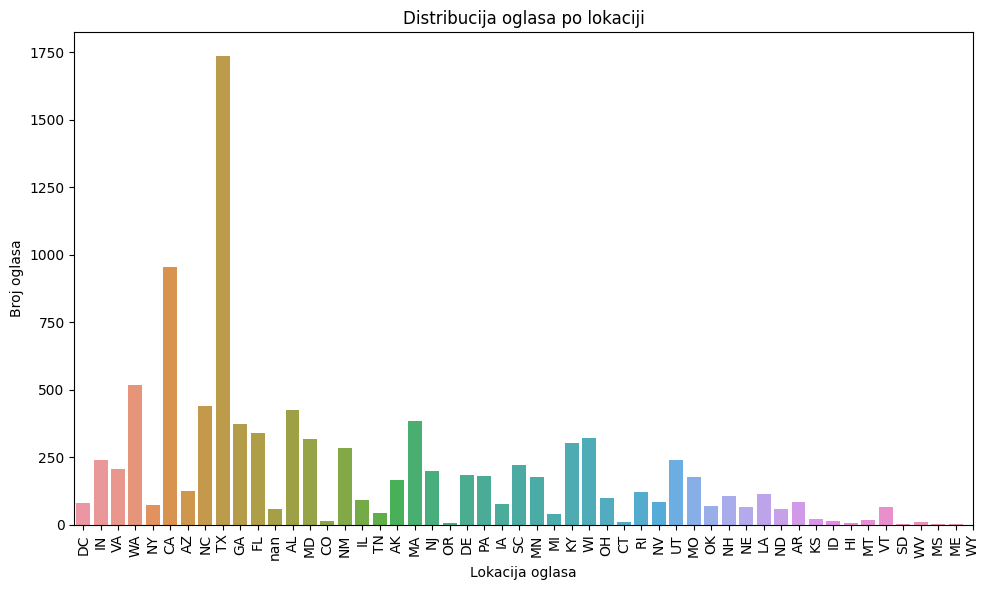

In [16]:
# Generisanje count plot-a za kategoricke vrednosti 'state'
# Postavljanje veličine grafa
plt.figure(figsize=(10, 6))

# Generisanje count plot-a za kategoricke vrednosti 'state'
sns.countplot(data=df, x='state')

# Dodatno formatiranje grafa
plt.xlabel('Lokacija oglasa')
plt.ylabel('Broj oglasa')
plt.title('Distribucija oglasa po lokaciji')

plt.xticks(rotation=90)
plt.xticks(range(len(df['state'].unique())), df['state'].unique()) 

plt.tight_layout()  # Bolje formatiranje layout-a
plt.show()

Najvise oglasa je pronadjeno za lokaciju Texas i California, dok je na trecem mestu Washington.

Najmanje ih ima u sledecim: South Dakota, Mississipi, Meine, Wyoming.

Ostala je jos kvadratura stana. Buduci da Evropljanima (i ostatku sveta) ne znaci puno jedinica za meru kao sto je square feet, bez gubljenja na kvalitetu rezultata se moze primeniti konverzija u standardne metre kvadratne. <br>
1 sqft = 0.092903 m2

In [17]:
df['square_feet'] = df['square_feet'] * 0.093

In [18]:
df.rename(columns={'square_feet' : 'square_meters'}, inplace=True)

In [19]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_meters,address,cityname,state,latitude,longitude,source,time
0,5668626895,apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,9.393,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,9.858,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,9.951,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,10.788,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,11.625,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


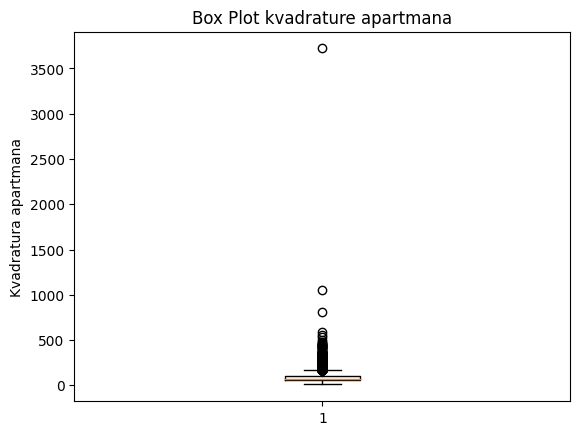

In [20]:
plt.boxplot(df['square_meters'])

# Dodatno formatiranje grafa
plt.ylabel('Kvadratura apartmana')
plt.title('Box Plot kvadrature apartmana')
plt.show()

I ovde ne vidimo znacajnije autlajere osim jednog. 

In [21]:
df['square_meters'].describe()

count    10000.000000
mean        87.960376
std         60.985283
min          9.393000
25%         60.357000
50%         74.586000
75%        102.300000
max       3720.000000
Name: square_meters, dtype: float64

In [22]:
df.loc[df['square_meters'] == 3720.0000]['title']

9998    One BR in New York NY 10069
Name: title, dtype: object

In [23]:
# Izračunavanje prosečne cene za jednosobne njujorkske apartmane 
df.loc[df['square_meters'] == 3720.0000, 'square_meters'] = 0
prosecna_kvadratura_jednosobnih = df[(df['bedrooms'] == 1) & (df['state'] == 'NY')]['square_meters'].mean()
prosecna_kvadratura_jednosobnih

69.099

In [24]:
df.loc[df['square_meters'] == 0, 'square_meters'] = 71
df.sort_values(by='square_meters')

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_meters,address,cityname,state,latitude,longitude,source,time
0,5668626895,apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,9.393,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,9.858,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,9.951,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,10.788,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,11.625,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,5668627239,apartment,Five BR 18605 Avenue Monaco,"This unit is located at 18605 Avenue Monaco, Lutz, 33558, FLMonthly rental rates range from $6900We have 5 beds units available for rent","Dishwasher,Pool,Refrigerator",5.0,5.0,USD,No,Thumbnail,...,"$6,900",Monthly,530.100,18605 Ave,Lutz,FL,28.1253,-82.4468,RentLingo,1577359442
9994,5664597657,apartment,Six BR 2536 W Canyon Ridge Rd.,"This unit is located at 2536 W Canyon Ridge Rd., St. George, 84770, UTMonthly rental rates range from $3000We have 6 beds units available for rent",NaN,4.0,6.0,USD,No,Thumbnail,...,"$3,000",Monthly,550.653,2536 W Canyon Ridge Road,Saint George,UT,37.0835,-113.5823,RentLingo,1577017103
9995,5630240092,apartment,Five BR 5407 Abbott Place - Abbott,"This unit is located at 5407 Abbott Place - Abbott, Edina, 55410, MNMonthly rental rates range from $6000We have 5 beds units available for rent",NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,585.900,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,810.588,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419


In [25]:
df['square_meters'].describe()

count    10000.000000
mean        87.595476
std         48.987726
min          9.393000
25%         60.357000
50%         74.586000
75%        102.300000
max       1052.574000
Name: square_meters, dtype: float64

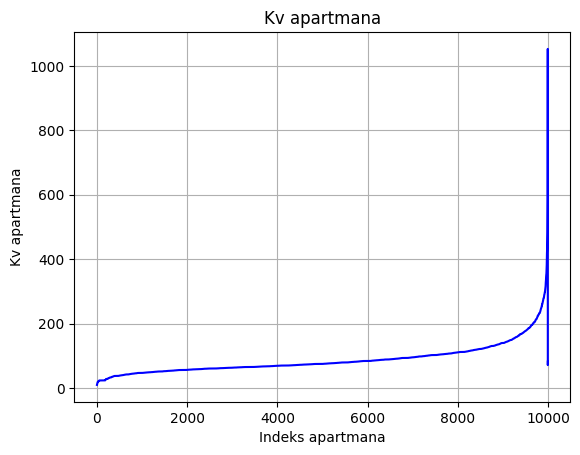

In [26]:
# Generisanje grafikona cene apartmana
plt.plot(df.index, df['square_meters'], color='blue', linestyle='-')

# Dodatno formatiranje grafa
plt.xlabel('Indeks apartmana')
plt.ylabel('Kv apartmana')
plt.title('Kv apartmana')
plt.grid(True)
plt.show()

In [27]:
df.loc[df['square_meters'] == 1052.574000]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_meters,address,cityname,state,latitude,longitude,source,time
9997,5668643292,apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, Potomac, 20854, MDMonthly rental rates range from $11000We have 6 beds units available for rent",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,1052.574,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560


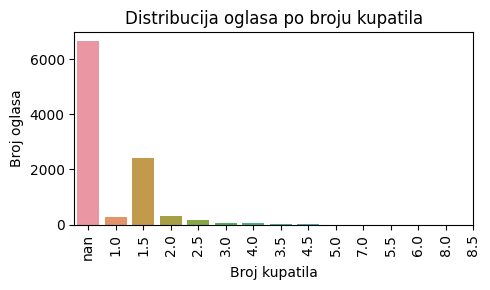

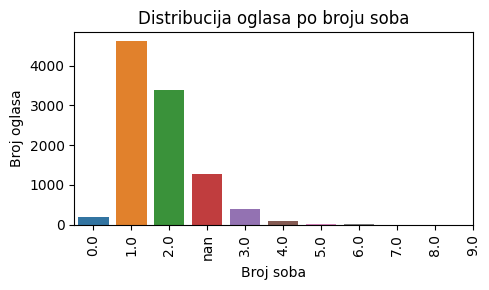

In [28]:
# Generisanje count plot-a za kategoricke vrednosti 'state'
# Postavljanje veličine grafa
plt.figure(figsize=(5, 3))

# Generisanje count plot-a za kategoricke vrednosti 'state'
sns.countplot(data=df, x='bathrooms')

# Dodatno formatiranje grafa
plt.xlabel('Broj kupatila')
plt.ylabel('Broj oglasa')
plt.title('Distribucija oglasa po broju kupatila')

plt.xticks(rotation=90)
plt.xticks(range(len(df['bathrooms'].unique())), df['bathrooms'].unique()) 

plt.tight_layout()  # Bolje formatiranje layout-a
plt.show()

# Generisanje count plot-a za kategoricke vrednosti 'state'
# Postavljanje veličine grafa
plt.figure(figsize=(5, 3))

# Generisanje count plot-a za kategoricke vrednosti 'state'
sns.countplot(data=df, x='bedrooms')

# Dodatno formatiranje grafa
plt.xlabel('Broj soba')
plt.ylabel('Broj oglasa')
plt.title('Distribucija oglasa po broju soba')

plt.xticks(rotation=90)
plt.xticks(range(len(df['bedrooms'].unique())), df['bedrooms'].unique()) 

plt.tight_layout()  # Bolje formatiranje layout-a
plt.show()

Vise od polovine oglasa navodi da ima 0 kupatila, sto nije realna slika, tako da ovaj atribut nece ulaziti u obzir. <br>
Sto se tice broja soba, oko polovine su jednosobni apartmani, uz znacajan broj nedostajucih vrednosti, sto je problem za kasnije resavanje. <br>
Ova distribucija je osnova za pitanje 'Da li broj soba utice na cenu apartmana'.

Dakle imam pocetak:
imam distribuciju podataka za klase: cena, kvadratura, lokacija, broj soba, broj kupatila
imam izvedene autlajere i resene autlajere
U posebnoj svesci cu se baviti nedostajucim vrednostima. 

In [29]:
df.to_csv('apartments_analysis.csv', index=False)